# Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from skimage import io
from PIL import ImageFile
drive.mount('/content/drive')

Mounted at /content/drive


# Turns One Clip into a DF (Helper Function)

In [ ]:
# Function: Create a df for a given game/clip combination

def create_df(game, clip):

  path = '/content/drive/MyDrive/395FinalProject/Dataset/game' + game + '/Clip' + clip + '_Labeled/Clip' + clip + '_Labels.csv'

  clip_labels = pd.read_csv(path)
  image_dir = path = '/content/drive/MyDrive/395FinalProject/Dataset/game' + game + '/Clip' + clip + '/'

  images = []
  for img_name in clip_labels['file name']:
    img_path = image_dir + img_name
    img = cv2.imread(img_path)
    images.append(img)

  clip_labels['image_data'] = images

  clip_labels['game'] = game

  clip_labels['clip'] = clip

  return clip_labels

# Turns One Game's Clips into a DF

In [ ]:
def generate_df(num_game, num_clips, output):

  # Create an array to store games for a clip
  game_clips = []

  # For each clip, create a df and append it to the list of clips
  for i in range(1,num_clips+1):
    print(i)
    game_clips.append(create_df(str(num_game), str(i)))

  # Concatenate the DataFrames in the game_clips list into a single DataFrame
  combined_df = pd.concat(game_clips, ignore_index=True)

  # Print df
  combined_df.head()

  # Convert to csv
  combined_df.to_csv(output + '.csv', index=False)

# generate_df(8, 9, 'game8')


# Tag CSV Name Column by Game and Clip number

In [ ]:
# Loading / Manipulating Data

def rename_columns(game_num):

  path = '/content/drive/MyDrive/395FinalProject/Dataset/game' + game_num + '.csv'

  game = pd.read_csv(path)

  game['file name'] = game['file name'].str.split('.').str[0]

  game = game.iloc[:, 0:9]

  #this here should work now
  game['name'] = game['game'].astype(str) + '.' + game['clip'].astype(str) + '.' + game['file name'].astype(str)

  game = game.drop(['game', 'clip', 'file name'], axis=1)

  column_name = game.pop('name')
  game.insert(0, 'name', column_name)

  game.head()

  return game

game1 = rename_columns('1')
game8 = rename_columns('8')

game1.head()
game8.head()

,name,visibility,x-coordinate,y-coordinate,status,shot,image_data
0,8.1.0000,1,602,106,0,0.0,[[[ 9 10 8]\n [ 9 10 8]\n [ 9 10 ...
1,8.1.0001,1,603,109,0,0.0,[[[ 9 10 8]\n [ 9 10 8]\n [ 9 10 ...
2,8.1.0002,1,604,115,0,0.0,[[[ 9 10 8]\n [ 9 10 8]\n [ 9 10 ...
3,8.1.0003,1,604,120,0,0.0,[[[ 9 10 8]\n [ 9 10 8]\n [ 9 10 ...
4,8.1.0004,1,605,125,1,0.0,[[[ 9 10 8]\n [ 9 10 8]\n [ 9 10 ...


# Renaming Images


In [ ]:
import os

def rename_files(game, clip, folder_path):
    folder_path = os.path.join(folder_path, f"game{game}", f"Clip{clip}")
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".jpg"):
                old_path = os.path.join(root, file_name)
                new_name = f"{game}.{clip}.{file_name}"
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

def rename_files_for_game(game, num_clips, folder_path):
    for clip in range(1, num_clips + 1):
        rename_files(game, clip, folder_path)

# Example usage:
# rename_files_for_game(8, 9, "/content/drive/MyDrive/395FinalProject/Dataset")

def remove_prefix(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".jpg") and file_name.startswith("1.1."):
                old_path = os.path.join(root, file_name)
                new_name = file_name.replace("9.7.", "")
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

# Example usage:
#remove_prefix("/content/drive/MyDrive/395FinalProject/Dataset/game9/Clip7")

# Image Size Demo

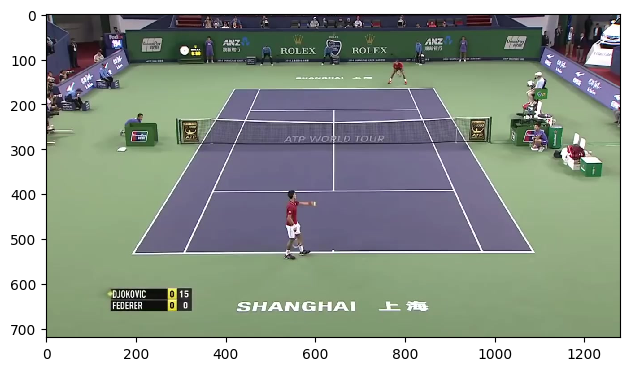

torch.Size([720, 1280, 3])
torch.Size([3, 720, 1280])
torch.Size([1, 3, 720, 1280])
torch.Size([1, 3, 140, 240])


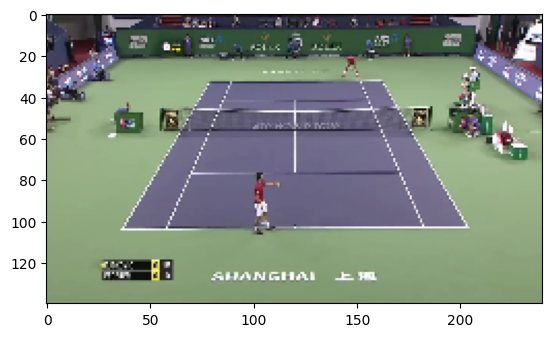

In [ ]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/395FinalProject/Dataset/images/'

my_img = io.imread("/content/drive/MyDrive/395FinalProject/Dataset/images/1.1.0000.jpg")
io.imshow(my_img)
io.show()

my_img.shape

## Convert to tensor and check the shape
cat = torch.from_numpy(my_img)
print(cat.shape)

## Move third dimension (color channels) to the first dimension
cat2 = torch.movedim(cat, source=2, destination=0)
print(cat2.shape)

## Add a new first dimension (noting that this is the only sample)
cat_final = torch.unsqueeze(cat2, dim=0)

## The tensor is now in "standard" format and ready for ML models
print(cat_final.shape)

from torch.nn import functional
cat_resized = functional.interpolate(cat_final, size = (140,240))
print(cat_resized.shape)

import matplotlib.pyplot as plt
cat_format = torch.movedim(cat_resized[0], source=0, destination=2)
plt.imshow(cat_format)
plt.show()


# Renaming Images Sequentially

In [ ]:
import os
import shutil

def copy_and_rename_images(directory):
    # Create a new directory to store copied and renamed images
    new_directory = os.path.join(os.path.dirname(directory), 'images2')
    os.makedirs(new_directory, exist_ok=True)

    # Get a list of all files in the directory
    files = os.listdir(directory)

    # Sort files based on version number
    files.sort(key=lambda x: [int(v) if v.isdigit() else v for v in x.split('.')])

    # Copy and rename each file sequentially
    for i, filename in enumerate(files, start=1):
        # Construct the full paths for old and new filenames
        old_path = os.path.join(directory, filename)
        new_filename = str(i) + '.jpg'  # Simplified renaming
        new_path = os.path.join(new_directory, new_filename)

        # Check if the file is a regular file and is within the images directory
        if os.path.isfile(old_path) and old_path.startswith(directory):
            # Copy the file to the new directory
            shutil.copy(old_path, new_path)

# Example usage:
#directory = '/content/drive/MyDrive/395FinalProject/Dataset/images'
#copy_and_rename_images(directory)
#print("Images copied and renamed successfully.")


# Renaming CSV Name Column Sequentially

In [ ]:
import pandas as pd

def rename_csv_column(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Modify the 'name' column
    df['name'] = range(1, len(df) + 1)

    # Save the modified DataFrame back to the CSV file
    df.to_csv(output_file, index=False)

# Example usage:
csv_file = '/content/drive/MyDrive/395FinalProject/Dataset/game18.csv'
output_file = '/content/drive/MyDrive/395FinalProject/Dataset/game182.csv'
rename_csv_column(csv_file)
print("CSV file column 'name' renamed successfully.")

CSV file column 'name' renamed successfully.


# Counting Items in a Directory

In [ ]:
import os

def count_items(directory):
    count = len(os.listdir(directory))
    return count

# Example usage:
directory = '/content/drive/MyDrive/395FinalProject/Dataset/images2'
num_items = count_items(directory)
print("Number of items in directory:", num_items)

Number of items in directory: 3784


# New Directory for Resized Images

# (End of Data Preparation)

In [ ]:
# 3784 files in images folder

import os
from PIL import Image

path = '/content/drive/MyDrive/395FinalProject/Dataset/images2/'

# Create a new directory to save resized images
os.makedirs(os.path.join(path, 'new'), exist_ok=True)

for item in os.listdir(path):
    if os.path.isfile(os.path.join(path, item)):
        im = Image.open(os.path.join(path, item))
        f, e = os.path.splitext(item)
        imResize = im.resize((240,120), Image.LANCZOS)
        imResize.save(os.path.join(path, 'new', item), 'JPEG')
